<h1 align="center">Supervised Learning. Regression</h1>
<h2 align="center">Predicting Car Prices</h2>
<p align="center">
  <img src="image/car_prj.png" alt="Car Project" width="400">
</p>

1. Import libraries that is needed for the project

In [2]:
import numpy as np              # for matrix computations
import pandas as pd             # for data analysis & preprocessing
import matplotlib.pyplot as plt # for visualization
import seaborn as sns           # for visualization

from sklearn import linear_model        # linear models
from sklearn import metrics             # metrics
from sklearn import preprocessing       # preprocessing
from sklearn.model_selection import train_test_split  # train/test split
import warnings # to supress warnings - will discuss this later

#### Stages of the project:
1. **Business Understanding** — analysis of requirements  
2. **Data Understanding** — exploration of data  
3. **Data Preparation** — preprocessing and cleaning  
4. **Modeling** — building predictive models  
5. **Evaluation** — assessing model performance  
6. **Deployment** — implementation of the model in practice  

### Business Understanding

- Build an ML model that predicts the sale price of cars. The model’s average prediction error should be **$2,000**.

2. Importing the data

In [3]:
# Upload the data
car_data = pd.read_csv('data/CarData.zip')
display(car_data.head(3))
display(car_data.tail(3))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4


Each car is described by the following features:
1. **model** — car model
2. **year** — year of manufacture
3. **price** — price (target feature)
4. **transmission** — transmission (manual, automatic, semi-automatic)
5. **mileage** — mileage
6. **fuelType** — engine type (petrol, diesel, hybrid)
7. **tax** — tax
9. **mpg** — fuel consumption
10. **engineSize** — engine size

- Check and discuss the dimension of the data

In [4]:
car_data.shape

(10668, 9)

- Present and discuss the summary of the DataFrame's structure

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


## <center> Attempt №1

In the first attempt, we must determine whether the task is solvable and whether the model can achieve a **baseline** level of quality.  
To do this, we perform a brief data exploration, basic preprocessing, and build a simple model **without** hyperparameter tuning.

### 3. Data Exploration

The goal of this step is to understand the weaknesses and strengths of the provided data, determine their sufficiency, assess relationships between features, and propose ideas on how to use them.

- Display and discuss descriptive statistics

In [6]:
car_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


- Present descriptive statistics for variables with `object` datatype

In [7]:
car_data.describe(include='object')

,model,transmission,fuelType
count,10668,10668,10668
unique,26,3,3
top,A3,Manual,Diesel
freq,1929,4369,5577


- Count how many times each unique car model appears in the dataset

In [8]:
car_data.model.value_counts()

model
A3     1929
Q3     1417
A4     1381
A1     1347
A5      882
Q5      877
Q2      822
A6      748
Q7      397
TT      336
A7      122
A8      118
Q8       69
RS6      39
RS3      33
RS4      31
RS5      29
R8       28
S3       18
SQ5      16
S4       12
SQ7       8
S8        4
S5        3
A2        1
RS7       1
Name: count, dtype: int64

- Create a copy of the dataset and work with this new copied sample

In [9]:
temp_data = car_data.copy()

- Do initial exploration of how the target variable **price** depends on the numerical features.

In [10]:
types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
num_features

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

 - For each numerical feature, build a histogram and a scatter plot with a linear regression line. What conclusions do you come up with?

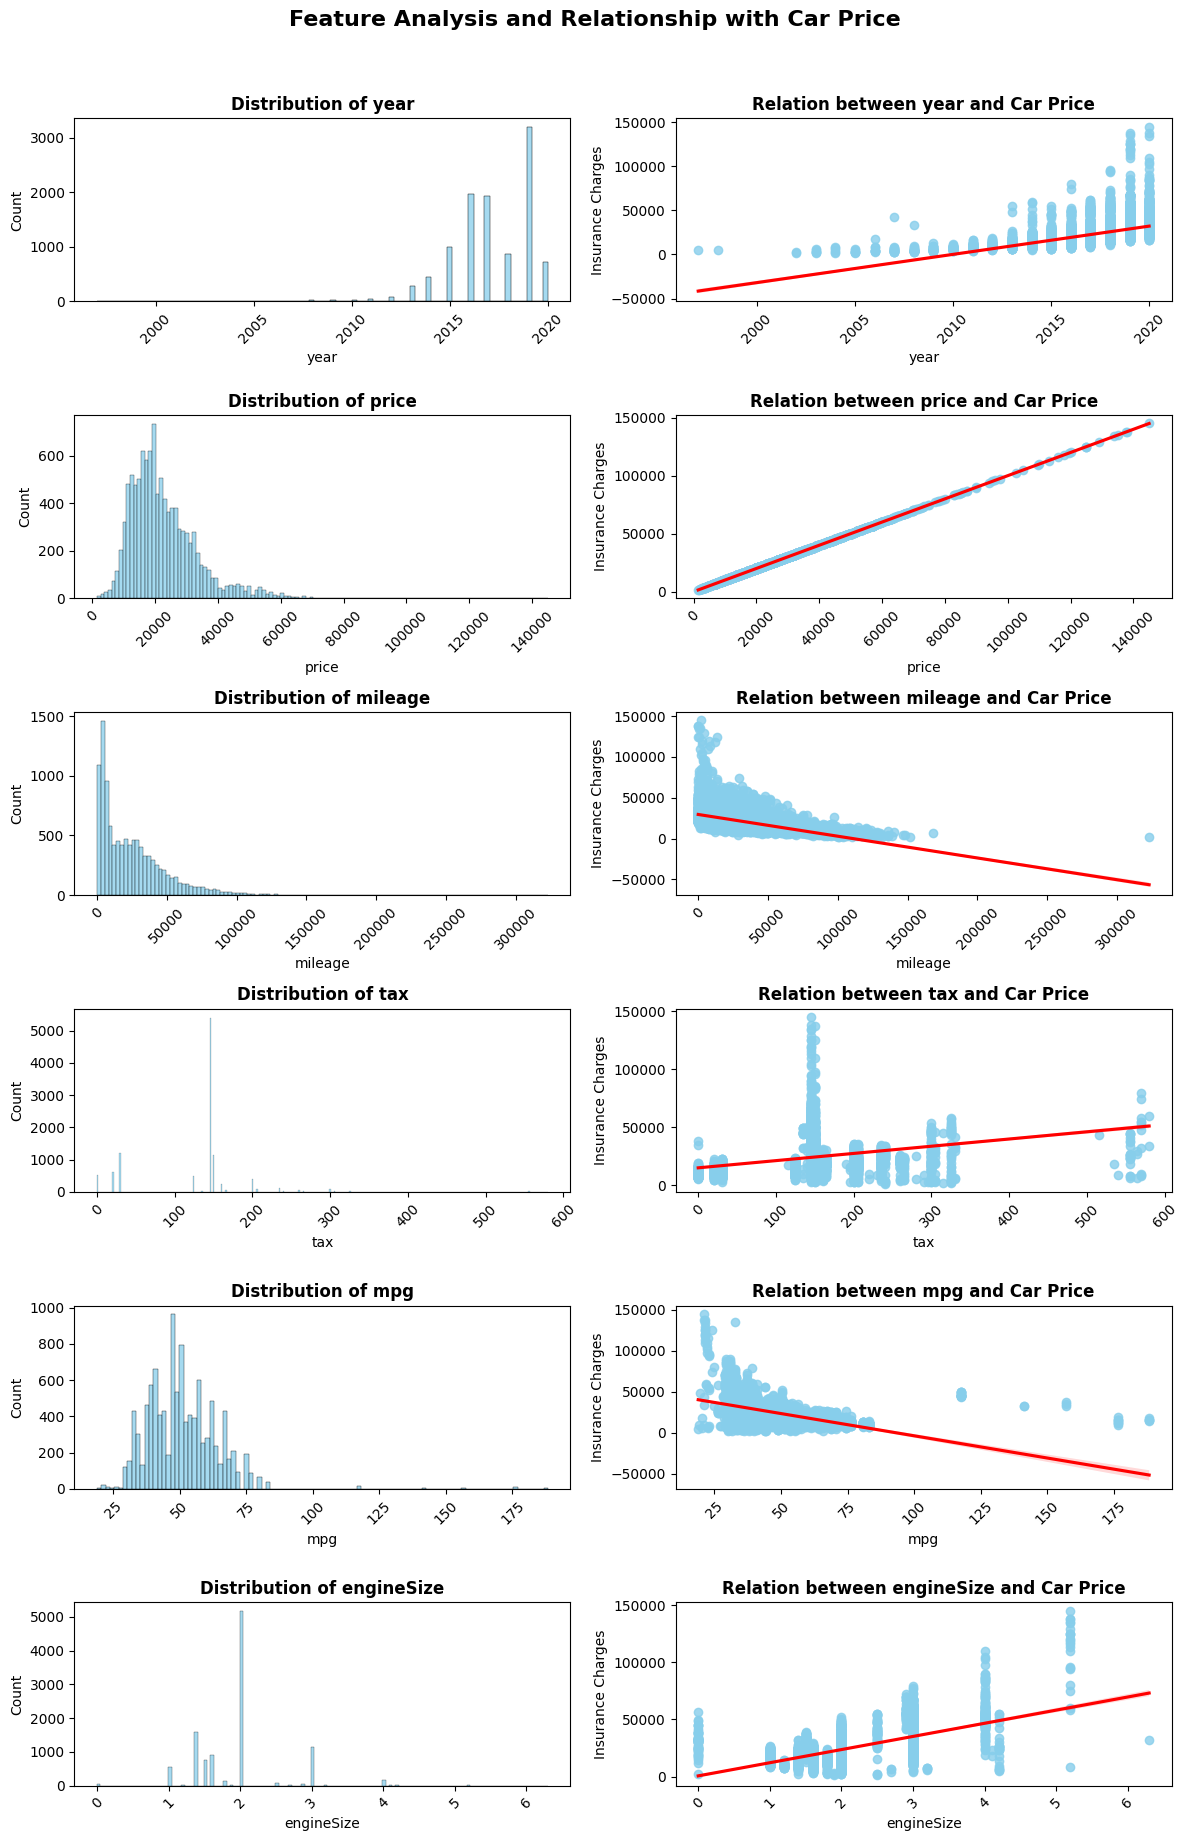

In [11]:
# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

n = len(num_features)
fig, axes =  plt.subplots(n, 2, figsize = (12, n*3)) # Dynamically scale height based on number of features

for ind, feature in enumerate(num_features):
    # Histogram with KDE
    hist = sns.histplot(data=temp_data, x=feature, ax=axes[ind][0], color = 'skyblue')
    hist.set_title(f'Distribution of {feature}', fontsize = 12, fontweight = 'bold')
    hist.set_xlabel(f'{feature}', fontsize=10)
    hist.set_ylabel('Count', fontsize=10)
    hist.xaxis.set_tick_params(rotation=45)
    # Regression Plot
    regplot = sns.regplot(
        data=temp_data, x=feature, y='price', ax = axes[ind][1],
        scatter_kws ={'color': 'skyblue'}, line_kws = {'color': 'red'}
    )
    regplot.set_title(f'Relation between {feature} and Car Price', fontsize = 12, fontweight = 'bold')
    regplot.set_xlabel(f'{feature}', fontsize=10)
    regplot.set_ylabel('Insurance Charges', fontsize=10)
    regplot.xaxis.set_tick_params(rotation=45)
    
# Add a main title
fig.suptitle('Feature Analysis and Relationship with Car Price', fontsize=16, fontweight='bold', y=1.02)
# Adjust layout and save
plt.tight_layout()
#plt.savefig('feature_analysis_insurance_charges_with_kde.png', dpi=300, bbox_inches='tight')
plt.show();    

- Build a heatmap of the correlation matrix to assess multicollinearity and the linear relationships between features and the target variable (**price**).

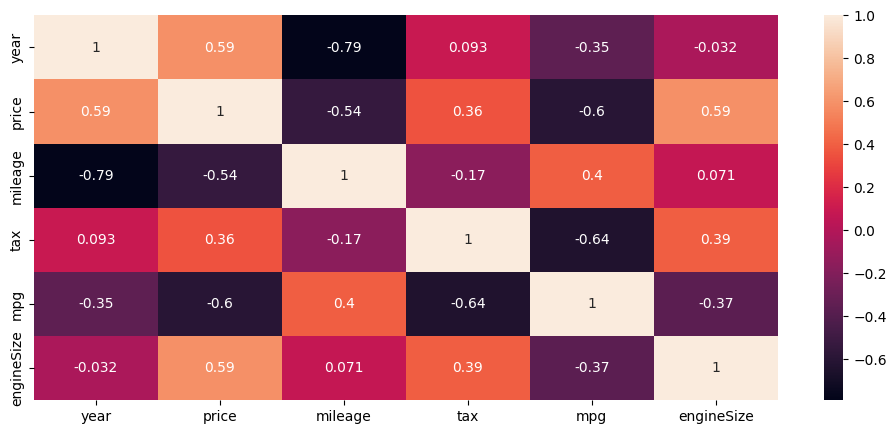

In [12]:
fig = plt.figure(figsize=(12, 5))
sns.heatmap(temp_data.corr(numeric_only=True), annot=True);

### 4. Data Preparation

The goal of this stage is to prepare the training dataset for use in modeling.

The linear regression model that we will use requires all data to be represented `numerically`.  
Therefore, during the data preparation stage, we must ensure that all categorical text features are properly encoded.

In addition, if there are any missing values in the dataset, they must be handled as well —  
missing data will cause an error when feeding the dataset into the model.

- Perform One-Hot Encoding of categorical features using pandas get_dummies()

In [13]:
# Code
dummies_data = pd.get_dummies(temp_data)
dummies_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1,2016,16500,36203,20,64.2,2.0,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,2016,11000,29946,30,55.4,1.4,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2017,16800,25952,145,67.3,2.0,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
4,2019,17300,1998,145,49.6,1.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True


- Do the same with OneHotEncoder from the category_encoders library

In [14]:
# import category_encoders as ce

# encoder = ce.OneHotEncoder(cols=['model', 'transmission', 'fuelType'])
# encoding_data = encoder.fit_transform(temp_data[['model', 'transmission', 'fuelType']])
# dummies_data_2 = pd.concat([temp_data.drop(['model', 'transmission', 'fuelType'], axis=1), encoding_data], axis=1)
# dummies_data_2.head()

- Split the dataset into observation matrix X (features) and target vector y

In [15]:
# Code
X = dummies_data.drop('price', axis=1)
y = dummies_data['price']

- Split the dataset into training and test sets in an 80/20 ratio

In [16]:
# Code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

# Let's print the dimension of the datasets
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8534, 37)
Test shape: (2134, 37)


### 6. Modeling + Model Evaluation

The goal of this stage is to build a model that solves the stated task and to evaluate its quality.

- Create a function `print_metrics(y_train, y_train_predict, y_test, y_test_predict)` that:

    - Computes and prints **R²**, **MAE**, and **MAPE (%)** for the **training set**.  
    - Computes and prints **R²**, **MAE**, and **MAPE (%)** for the **test set**.  
    - Uses `sklearn.metrics` functions for all metrics.  
    - Formats each value to **three decimals**.

In [17]:
# Code
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

**Linear Regression Model:**

The linear regression model has the following form:

$$
\widehat{y_i} = w_0 + \sum_{j=0}^{m} w_j x_{ij}
$$

where  
- $x_{ij}$ — the element from the *i-th row* and *j-th column* of the feature matrix $X$,  
- $y_i$ — the true target value corresponding to $x_i$,  
- $w$ — the parameters (coefficients) of the linear regression model.

To find the model parameters, the **empirical risk minimization** principle is used —  
we search for such parameters $\omega$ that the loss function $L(\omega)$ is minimized.

As the loss function, we use **MSE** — the *Mean Squared Error*.



$$L(\omega) = MSE = \frac{1}{n} * \sum_{i=1}^{n}{(y_i - \widehat{y_i})^2} \Rightarrow min_\omega $$

**Analytical Solution: Ordinary Least Squares (OLS):**

$$\omega=(X^TX)^{-1}X^Ty$$

In the **sklearn** library, linear regression with parameter estimation using **OLS** is implemented in the  
`LinearRegression` class from the `linear_model` module.

**Methods:**
- `fit()` — fits the parameters using OLS (model training)  
- `predict()` — makes predictions (substitutes an observation $x_i$ into the model and returns a prediction for each observation)

**Attributes:**
- `coef_` — coefficients $\omega_1$, $\omega_2$, $\ldots$, $\omega_m$ found using OLS (as a vector)  
- `intercept_` — intercept term $\omega_0$


In [18]:
# Code
# Initialize the LinearRegression object
lr = linear_model.LinearRegression()
# Train the model — find parameters
lr.fit(X_train, y_train)
# Make predictions for each split
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
# Print the resulting metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.890
Train MAE: 2534.005
Train MAPE: 13.340


Test R^2: 0.896
Test MAE: 2633.087
Train MAPE: 13.320


**Numerical solution: Stochastic Gradient Descent (SGD):**

$$\omega^{(k+1)} = \omega^{(k)} - \eta\nabla L(\omega^{(k)})$$

In the **sklearn** library, linear regression with parameter estimation via **SGD** is implemented in the  
`SGDRegressor` class from the `linear_model` module.

**Methods:**
- `fit()` — parameter fitting via SGD (model training)  
- `predict()` — prediction (substitute an observation $x_i$ into the model and obtain a prediction for each observation)

**Attributes:**
- `coef_` — coefficients $\omega_1$, $\omega_2$, $\ldots$, $\omega_m$ obtained via SGD (as a vector)  
- `intercept_` — intercept term $\omega_0$


In [19]:
# Create an object for min-max normalization
scaler = preprocessing.MinMaxScaler()
# Compute normalization parameters — min and max for each column
scaler.fit(X_train)
# Transform each split
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Initialize the linear regression class (SGDRegressor)
sgd_lr = linear_model.SGDRegressor(random_state=42)
# Train the model — find parameters
sgd_lr.fit(X_train_scaled, y_train)
# Make predictions for each split
y_train_pred = sgd_lr.predict(X_train_scaled)
y_test_pred  = sgd_lr.predict(X_test_scaled)
# Print the resulting metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.887
Train MAE: 2533.410
Train MAPE: 13.668


Test R^2: 0.891
Test MAE: 2640.063
Train MAPE: 13.533


<div style="background-color:#1e4620; border:1px solid #2e7d32; color:#e0f2e9; padding:12px; border-radius:6px; margin:12px 0;">
Did you achive the target MAE of <b>$2,000</b>? If not, proceed to the <b>next attempt</b>
</div>

## Attempt №2

Assumption — model quality will improve if:
- Remove outliers in the data — cars with overstated (understated) prices, very high (low) mileage, and very high (low) fuel consumption.
- Transform the target variable from a lognormal distribution to a normal one using logarithmic transformation.

### 7. Data Analysis

- Investigate log-transformed distributions for outliers using the z-score (3-sigma) method.
    - Create two side-by-side histograms — one for `price`, one for `log(price)` — and on the log plot, draw vertical lines for the mean and ±3 standard deviations.

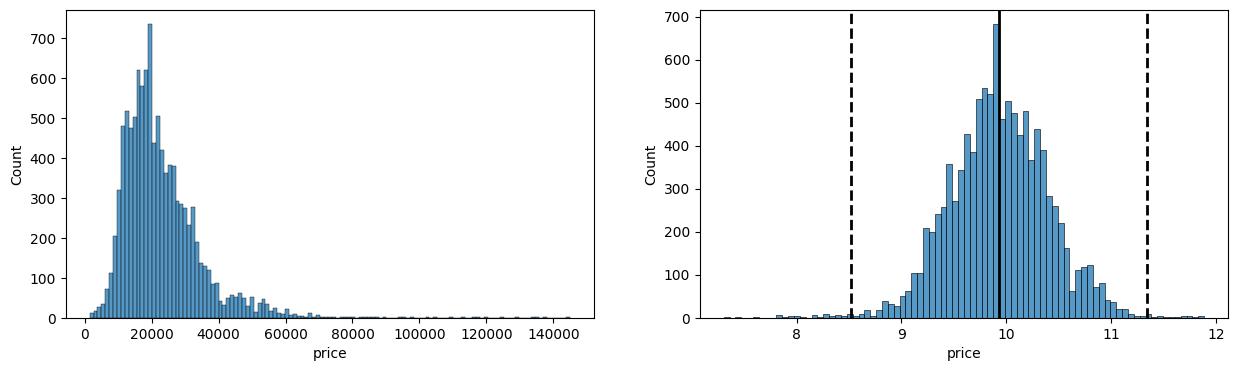

In [ ]:
# Code

fig, axes = plt.subplots(1, 2, figsize=(15, 4)) # figure + axes

# Plot histrogram
sns.histplot(data=temp_data, 
             x='price', 
             ax=axes[0]);

# Take logarithm
log_price = np.log(temp_data['price'])

# Plot histogram of the log-transformed prices
sns.histplot(data=log_price, 
             ax=axes[1]);

# Add vertical lines for the mean and ±3 standard deviations
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2);

- Do the same: create two side-by-side histograms — one for `mileage`, one for `log(mileage)` — and on the log plot, draw vertical lines for the mean and ±3 standard deviations.

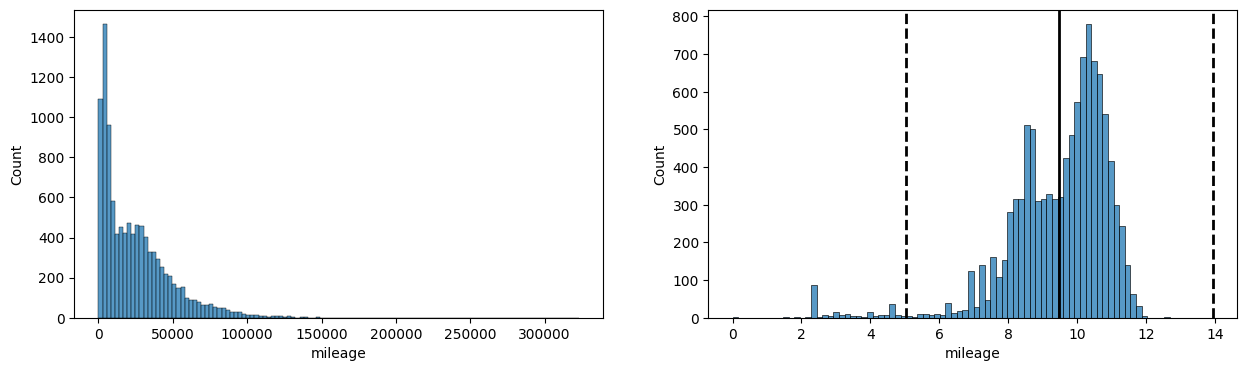

In [ ]:
# Code

# Plot histogram
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=temp_data, 
             x='mileage', 
             ax=axes[0]);

# Log-transform
log_price = np.log(temp_data['mileage'])

# Plot histogram in the logarithmic scale
sns.histplot(data=log_price, 
             ax=axes[1]);

# Add vertical lines for the mean and ±3 standard deviations from the mean
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2);


- Do the same: create two side-by-side histograms — one for `fuel consumption (mpg)`, one for `fuel consumption (mpg)` — and on the log plot, draw vertical lines for the mean and ±3 standard deviations.

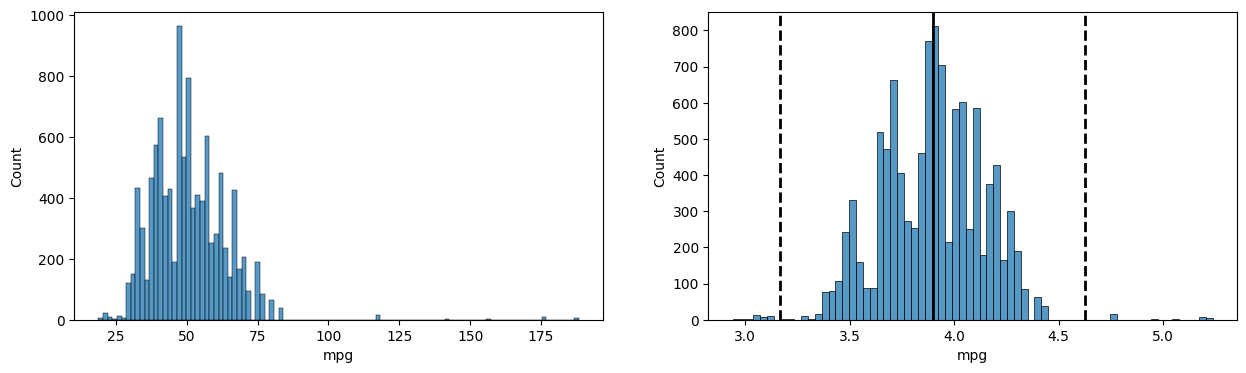

In [ ]:
# Code

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
# Plot histogram
sns.histplot(data=temp_data, 
             x='mpg', 
             ax=axes[0]);

# Log-transform
log_price = np.log(temp_data['mpg'])
sns.histplot(data=log_price, 
             ax=axes[1]);

# Add vertical lines for the mean and ±3 standard deviations from the mean
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean() + 3 * log_price.std(), color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean() - 3 * log_price.std(), color='k', ls='--', lw=2);

- For the three tests above present your own conclusions - discuss what you obtained

### 8. Data Preparation

- Remove outliers using the **z-score method** that should be applied to the **log-transformed features**. (Recall that the z-score method was studied in the data cleaning module.)
    - Write a `function` that removes outliers using the `z-score method (±3σ)`, optionally on a log scale, apply it sequentially to `price`, `mileage`, and `mpg`, and print the dataset shape before and after cleaning.

In [ ]:
# Code

# Define a function that filters outliers using the z-score method
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3*sigma
    upper_bound = mu + 3*sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]        
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# Perform cleaning
outliers, temp_cleaned = outliers_z_score(temp_data, 'price', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'mileage', log_scale=True)
outliers, temp_cleaned = outliers_z_score(temp_cleaned, 'mpg', log_scale=True)

print(f'Shape before cleaning outliers: {temp_data.shape}')
print(f'Shape after  cleaning outliers: {temp_cleaned.shape}')


Shape before cleaning outliers: (10668, 9)
Shape after  cleaning outliers: (10308, 9)


- Perform One-Hot Encoding of categorical features using pandas get_dummies()

In [42]:
# Encode categorical features
dummies_data = pd.get_dummies(temp_cleaned)
dummies_data.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A3,model_ A4,model_ A5,...,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2016,16500,36203,20,64.2,2.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,2016,11000,29946,30,55.4,1.4,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2017,16800,25952,145,67.3,2.0,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,2019,17300,1998,145,49.6,1.0,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


- From the dataset created above, set `X` to all columns except price and `y` to price, split into `train/test` (80/20, random_state=40), then print the shapes of `X_train` and `X_test`.

In [44]:
# X — observation matrix, y — target column
X = dummies_data.drop('price', axis=1)
y = dummies_data['price']

# Split the dataset into training and test sets in an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')


Train shape: (8246, 35)
Test shape: (2062, 35)


### 9. Modeling

- Train a linear regression model on the preprocessed data.

In [ ]:
# create the log-transformed target variable (price)
y_train_log = np.log(y_train)

# Initialize the LinearRegression object
lr = linear_model.LinearRegression()
# Train the model to predict the logarithm of the target
lr.fit(X_train, y_train_log)

# Make predictions for each split
# If trained on the logarithm, apply the inverse function (exponential) to predictions
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred  = np.exp(lr.predict(X_test))

# Print the resulting metrics
print_metrics(y_train, y_train_pred, y_test, y_test_pred)


Train R^2: 0.927
Train MAE: 1959.201
Train MAPE: 8.712


Test R^2: 0.917
Test MAE: 2060.712
Train MAPE: 9.061


Попробуем добавить в данные полиномиальные признаки и построить модель полиномиальной регрессии. Предварительно нормализуем данные:

In [28]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для каждой из выборок
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (8246, 665)
Test shape: (2062, 665)


Попробуем обучить модель линейной регрессии на сгенерированных данных. Спойлер: код выполнится с ошибкой. Причина - слишком высокие коэффициенты модели, из-за чего модель выдает огромные значения цены, которая затем еще и возводится в экспоненту, в результате чего возникает ошибка числа, не помещающегося в тип данных float64. 

In [29]:
# lr_poly = linear_model.LinearRegression()
# lr_poly.fit(X_train_scaled_poly, y_train_log)
# y_train_pred = np.exp(lr_poly.predict(X_train_scaled_poly))
# y_test_pred = np.exp(lr_poly.predict(X_test_scaled_poly))

# print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Решение проблемы огромных значений коэффициентов - использование регуляризации

Идея регуляризации - добавление в модель штрафа за высокие значения коэффициентов, которые являются прямым признаком переобучения. 

**Линейная регрессия с L2-регуляризацией**

L2-регуляризация добавляет к функции ошибки дополнительное слагаемое, которое вносит смещение в обучение модели. Слагаемое - сумма квадратов коэффициентов модели.

$$L(\omega) = MSE + \alpha \sum_{j=1}^{m}{\omega_j^2}$$

$\alpha$ - коэффициент регуляризации, чем он выше, тем большее смещение вносится в модель (тем сильнее штраф за переобучение)

В библиотеке sklearn линейная регрессия с L2-регуляризацией (гребневая регрессия) реализована в классе Ridge модуля linear_model. 

Методы:
* fit() - подгонка параметров по методу координатного спуска - безпроизводный аналов градиентного спуска (обучение модели)
* predict() - предсказание (подстановка наблюдения $x_i$ в модель и получение ответа для каждого наблюдения)

Атрибуты:
* coef_ - найденные коэффициенты $\omega_1, \omega_2,$ ...,$ \omega_m$ (в виде вектора)
* intercept_ - свободный член $\omega_0$

In [30]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.946
Train MAE: 1714.759
Train MAPE: 7.798


Test R^2: 0.934
Test MAE: 1826.895
Train MAPE: 8.184


Качество модели можно улучшить, если подробовать подобрать оптимальное значение коэффициента регуляризации $\alpha$ (по умолчанию в реализации sklearn $\alpha = 1$). Нас интересует такое значение коэффициента, при котором наблюдается наилучшее значение метрики на тестовой выборке (наименьшее значение MAE), если таких значений $\alpha$ несколько, то берем то, при котором разница в показателях на тренировочной и тестовой выборке наименьшая.


**Подбор параметра регуляризации $\alpha$**

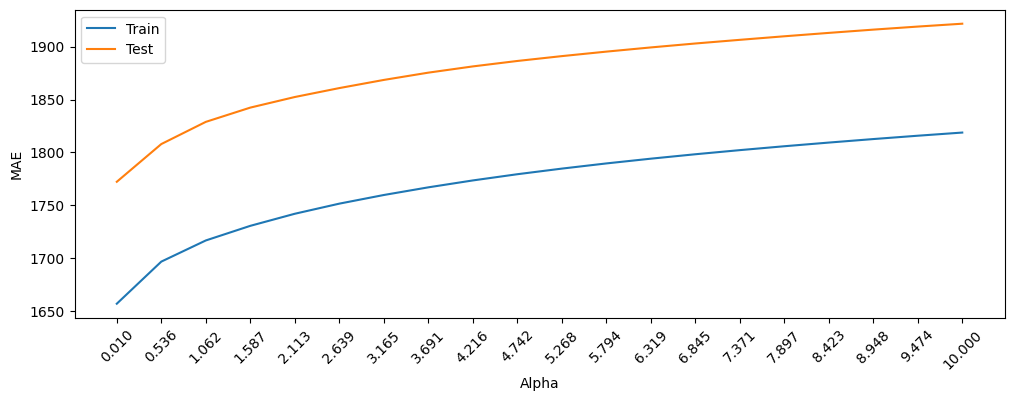

In [31]:
#Создаем список из 20 возможных значений от 0.001 до 10
alpha_list = np.linspace(0.01, 10, 20)
#Создаем пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаем объект класса линейная регрессия с L2-регуляризацией
    ridge_lr_poly = linear_model.Ridge(alpha=alpha, max_iter=10000)
    #Обучаем модель предсказывать логарифм целевого признака
    ridge_lr_poly.fit(X_train_scaled_poly, y_train_log)
    #Делаем предсказание для каждой из выборок
    #Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
    y_train_predict_poly = np.exp(ridge_lr_poly.predict(X_train_scaled_poly))
    y_test_predict_poly = np.exp(ridge_lr_poly.predict(X_test_scaled_poly))
    #Рассчитываем метрику для двух выборок и добавляем их в списки
    train_scores.append(metrics.mean_absolute_error(y_train, y_train_predict_poly))
    test_scores.append(metrics.mean_absolute_error(y_test, y_test_predict_poly))

#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('MAE') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

Наилучшее значение метрики соотвествует alpha=0.01 (кстати, можно попробовать перебрать значения alpha < 0.01).

Обучим модель линейной регрессии с L2-регуляризацией с коэффициентов регуляризации alpha=0.01

**Финальная модель**

In [32]:
#Создаем объект класса линейная регрессия с L2-регуляризацией
#Выставляем параметр alpha в подобранное выше значение
ridge_lr = linear_model.Ridge(alpha=0.01)
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr.fit(X_train_scaled_poly, y_train_log)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = np.exp(ridge_lr.predict(X_train_scaled_poly))
y_test_pred = np.exp(ridge_lr.predict(X_test_scaled_poly))

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.951
Train MAE: 1656.825
Train MAPE: 7.610


Test R^2: 0.937
Test MAE: 1772.183
Train MAPE: 7.994


Посмотрим на разброс ошибок нашей модели с помощью boxplot-диграммы. Это поможет нам понять, как много автомобилей в каждой из выборок, для которых мы допускаем высокую ошибку в предсказании цены.

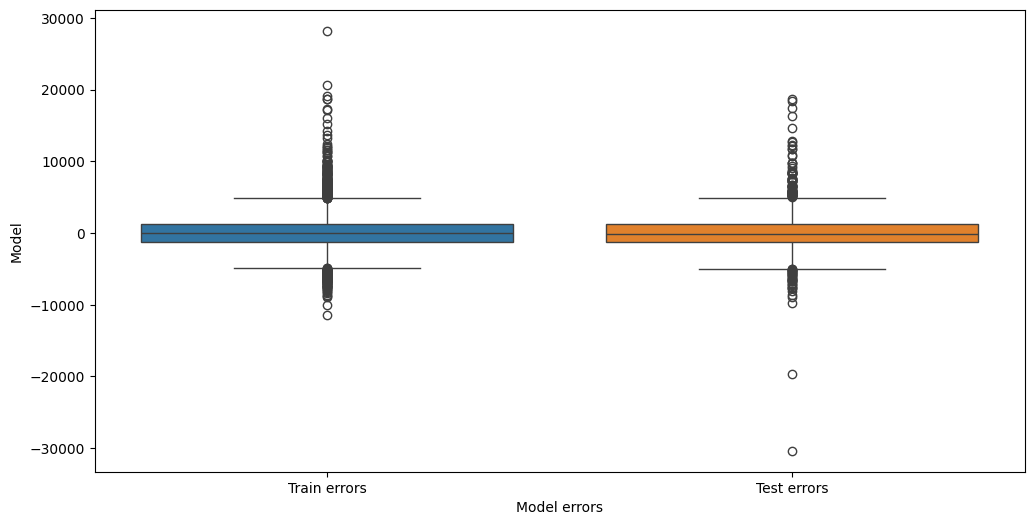

In [33]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Возможные дальнейшие шаги по улучшению:
* feature engineering - попыться сгенерировать новые признаки в данных/присоединить внешние источники, например данные о рейтинге каждой из моделей audi на рынке
* попытаться привести все числовые признаки к нормальному распределению (например, с помощью логарифмирования)
* объединить категориальный признак model в ценовые сегменты автомобилей, чтобы уменьшить количество категорий
* найти наблюдения, для которых наблюдается высокая ошибка между предсказанием и действительностью и понять, что с ними "не так"